In [1]:
import os
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img,img_to_array

folder = '/content/drive/MyDrive/DOCUMENTS/FLOWERS_DATA'
photos, labels = list(), list()
for file in listdir(folder):
  photo = load_img(folder+'/'+file, target_size=(150,150))
  photo = img_to_array(photo)
  output = int(file.split('_')[1])  #tach lay so id từ ảnh (ví dụ: ảnh 'LUAN_0_50.JPG' thì số id là 0)
  photos.append(photo)              
  labels.append(output) 

photos = asarray(photos)                        #lưu dữ liệu ảnh dưới dạng mảng
labels = asarray(labels)                        #lưu dữ liệu phân loại dạng mảng
class_name = ['Hoa Cúc','Hướng Dương','Vạn Thọ','Thược Dược']               #tạo tên class tương ứng với dữ liệu phân loại
print(photos.shape, labels.shape, class_name)


(50, 150, 150, 3) (50,) ['Hoa Cúc', 'Hướng Dương', 'Vạn Thọ', 'Thược Dược']


In [4]:
save('dogs_vs_cats_photos.npy',photos)
save('dogs_vs_cats_labels.npy',labels)

In [8]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3])

In [3]:
#import thu vien
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Activation,BatchNormalization, Dropout, LSTM, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.models import Sequential
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from tensorflow.keras.optimizers import RMSprop, SGD
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from sklearn.preprocessing import scale

In [23]:
x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.2, random_state=0)   #tạo dữ liệu train 80% và test 20%
print(x_train.shape)
print(y_test.shape)

(40, 150, 150, 3)
(10,)


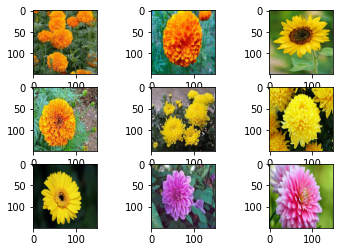

In [24]:
#show 9 ảnh đầu tiên trong tập dữ liệu train        #áo trắng: LUAN, #áo đen: DUY, #áo xanh: TAN
x_train_show = x_train.astype(int)            
import matplotlib.pyplot as plt
from matplotlib.image import imread
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train_show[i])
plt.show()

In [25]:
x_train/=255
x_test/=255
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

In [26]:
#tạo model
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same',))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same',))
model.add(MaxPooling2D((2,2)))

In [27]:
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform')) 
model.add(Dense(4, activation='Softmax'))

In [28]:
#train model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',  metrics=['accuracy'])
history = model.fit(x_train,y_train, batch_size=32,epochs=30,verbose=1,validation_data = (x_test, y_test))
model.save('/content/drive/MyDrive/DOCUMENTS/MODEL_STORES/model_flowers_CNN.h5')

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


2/2 [==============================] - 3s 690ms/step - loss: 2.0620 - accuracy: 0.2250 - val_loss: 8.6514 - val_accuracy: 0.1000
Epoch 2/30
2/2 [==============================] - 2s 524ms/step - loss: 7.0178 - accuracy: 0.1500 - val_loss: 1.3891 - val_accuracy: 0.2000
Epoch 3/30
2/2 [==============================] - 2s 513ms/step - loss: 1.4154 - accuracy: 0.2250 - val_loss: 1.3047 - val_accuracy: 0.5000
Epoch 4/30
2/2 [==============================] - 2s 511ms/step - loss: 1.2949 - accuracy: 0.6000 - val_loss: 1.3075 - val_accuracy: 0.5000
Epoch 5/30
2/2 [==============================] - 2s 519ms/step - loss: 1.2502 - accuracy: 0.6250 - val_loss: 1.2394 - val_accuracy: 0.5000
Epoch 6/30
2/2 [==============================] - 2s 493ms/step - loss: 1.1927 - accuracy: 0.5750 - val_loss: 1.1950 - val_accuracy: 0.5000
Epoch 7/30
2/2 [==============================] - 2s 502ms/step - loss: 1.1214 - accuracy: 0.5000 - val_loss: 1.1605 - val_accuracy: 0.5000
Epoch 8/30
2/2 [===============

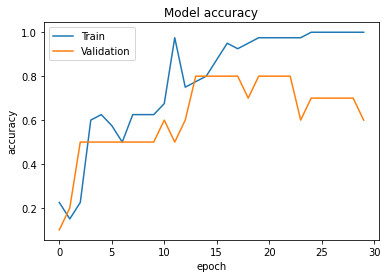

In [29]:
#ve do thi do chinh xac
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc='upper left')

[[9.9689317e-01 2.9229720e-03 1.8382733e-04 2.1614192e-14]]
This is Hoa Cúc


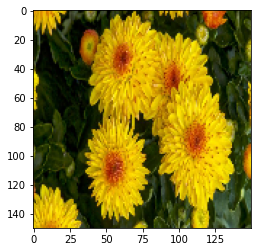

In [30]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

img = load_img('TEST_CUC_1.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img/=255.0

a = np.argmax(model.predict(img), axis=-1)
print(model.predict(img))
print('This is',class_name[int(a)])

[[0.01269802 0.6013335  0.38526133 0.00070723]]
This is Hướng Dương


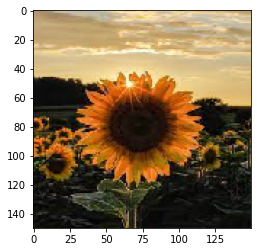

In [36]:
img = load_img('TEST_HD_1.jfif', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img/=255.0

a = np.argmax(model.predict(img), axis=-1)
print(model.predict(img))
print('This is',class_name[int(a)])

[[5.5563236e-12 5.2311580e-04 1.4634114e-06 9.9947542e-01]]
This is Thược Dược


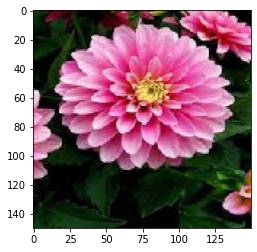

In [33]:
img = load_img('TEST_TD_2.jfif', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img/=255.0

a = np.argmax(model.predict(img), axis=-1)
print(model.predict(img))
print('This is',class_name[int(a)])

[[9.4029451e-07 1.6768765e-01 8.3229977e-01 1.1561868e-05]]
This is Vạn Thọ


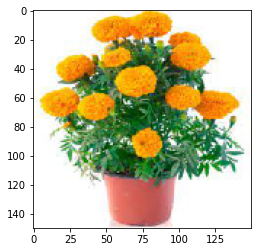

In [35]:
img = load_img('TEST_VT1.jfif', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img/=255.0

a = np.argmax(model.predict(img), axis=-1)
print(model.predict(img))
print('This is',class_name[int(a)])